In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

In [6]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [8]:
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')

# Print the DataFrame with renamed columns
print(customer_df.columns)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


In [10]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [11]:
customer_df.isnull()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9130,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9131,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9132,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
def separate_columns(dataframe):
    numerical_columns = dataframe.select_dtypes(include=[np.number])
    categorical_columns = dataframe.select_dtypes(include=['object', 'category'])
    return numerical_columns, categorical_columns

In [13]:
numerical_df, categorical_df = separate_columns(customer_df)

numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [14]:
correlation_matrix = numerical_df.corr()

In [15]:
highest_correlation = correlation_matrix.max().max()
variable_pair = correlation_matrix.stack().idxmax()

In [16]:
variable_pair

('customer_lifetime_value', 'customer_lifetime_value')

In [17]:
def separate_continuous_discrete(df, unique_threshold=36):
    continuous_cols = []
    discrete_cols = []

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            unique_values = df[col].nunique()
            if unique_values <= unique_threshold:
                discrete_cols.append(col)
            else:
                continuous_cols.append(col)

    continuous_df = df[continuous_cols]
    discrete_df = df[discrete_cols]

    return continuous_df, discrete_df

In [19]:
continuous_df, discrete_df = separate_continuous_discrete(customer_df)

In [20]:
continuous_df, discrete_df = separate_continuous_discrete(customer_df, unique_threshold=50)

In [21]:
def create_barplot(discrete_df):
    num_cols = len(discrete_df.columns)
    fig, axes = plt.subplots(num_cols, 1, figsize=(16, 16))

    for i, column in enumerate(discrete_df.columns):
        ax = axes[i]
        sns.countplot(x=column, data=discrete_df, ax=ax)
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.set_title(f'Bar Plot of {column}')

    plt.tight_layout()
    plt.show()

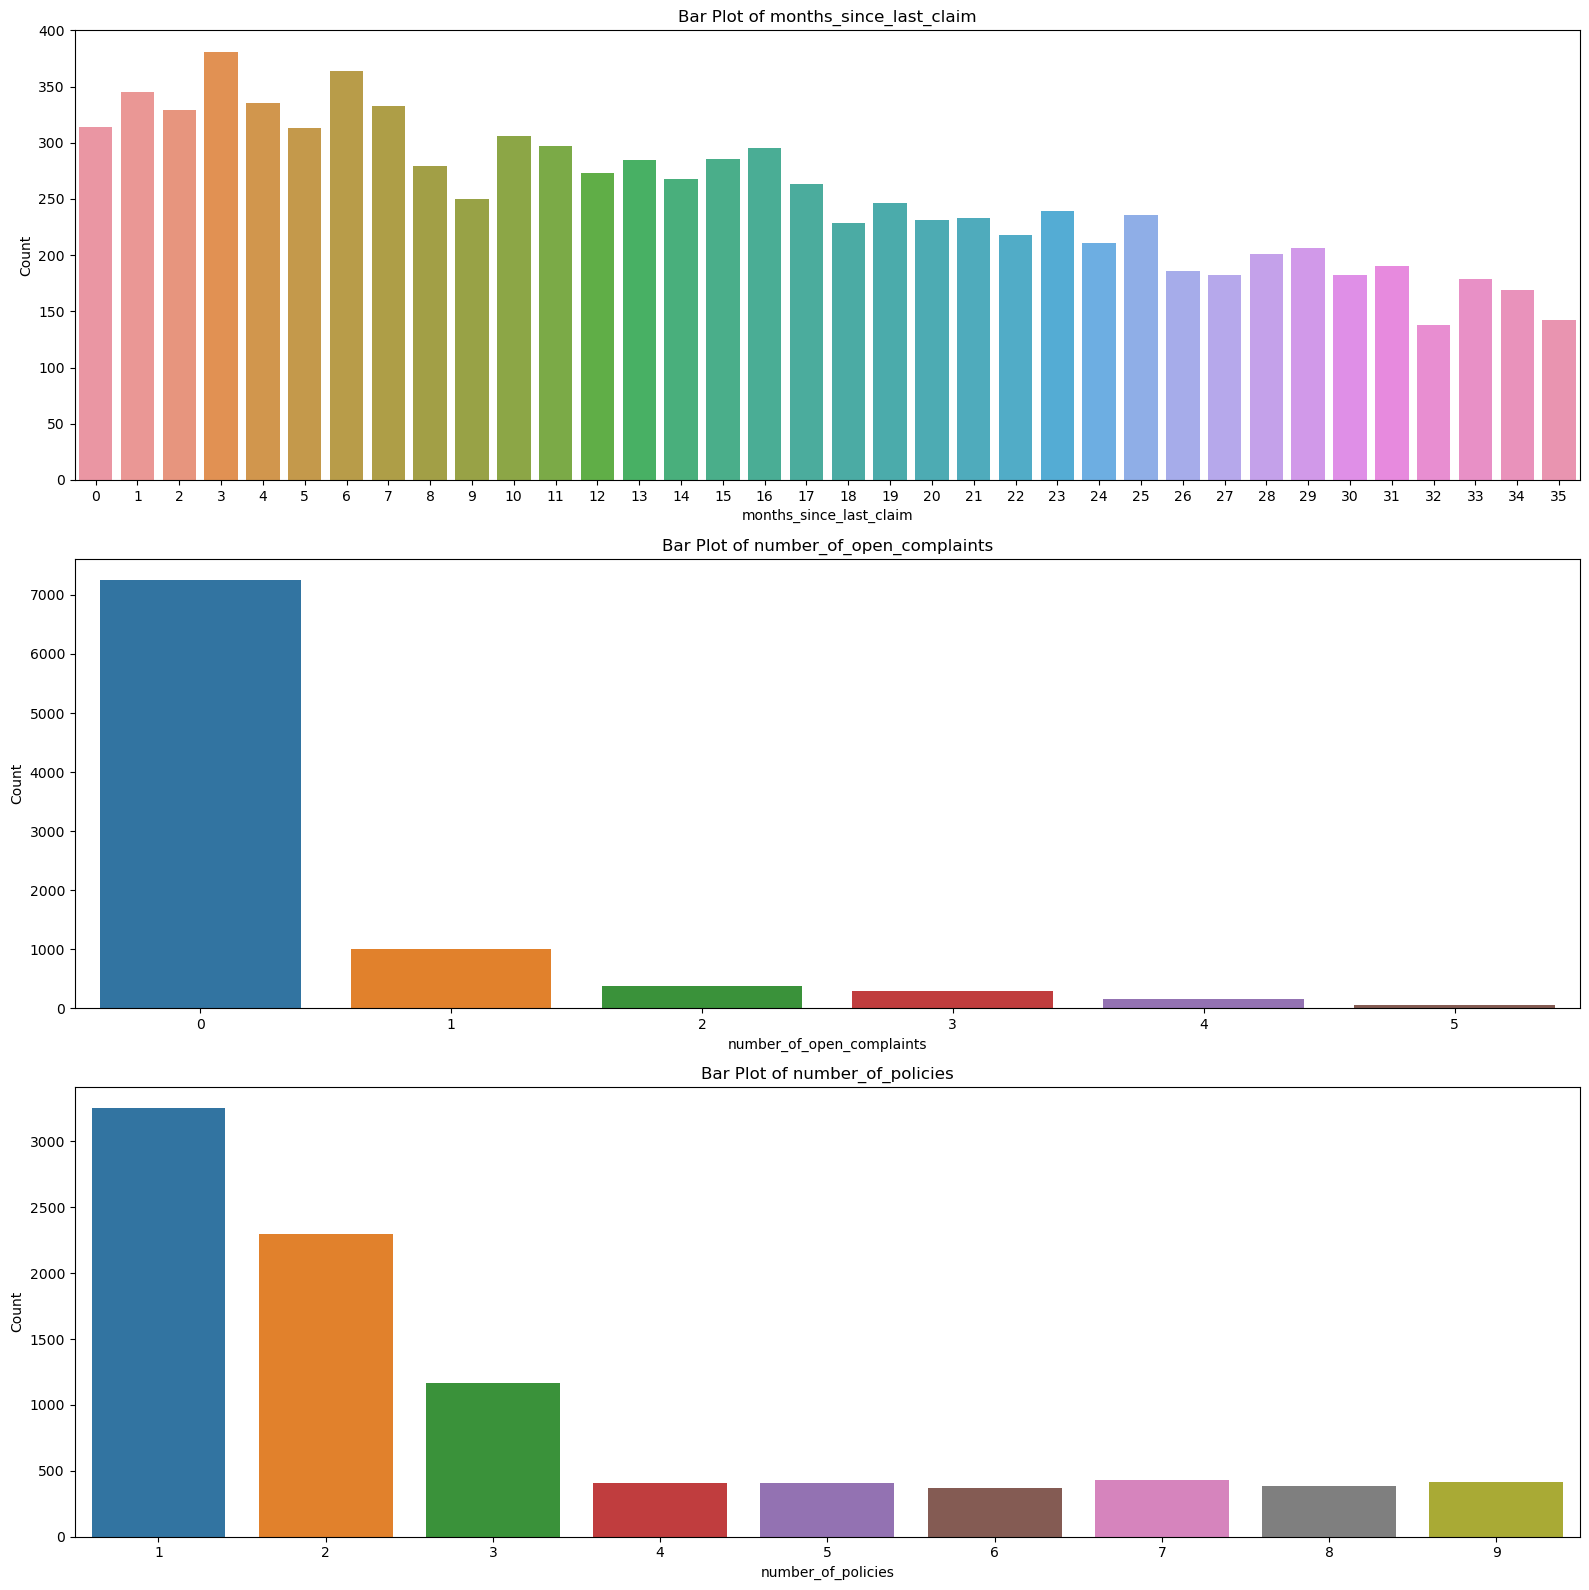

In [23]:
create_barplot(discrete_df)

In [24]:
def create_histograms(continuous_df):
    plt.figure(figsize=(16, 16))
    num_cols = continuous_df.select_dtypes(include=['float', 'int']).columns
    num_cols_count = len(num_cols)
    plot_rows = int(num_cols_count / 2) + (num_cols_count % 2 > 0)

    for i, col in enumerate(num_cols):
        plt.subplot(plot_rows, 2, i+1)
        sns.histplot(data=continuous_df, x=col, kde=True)
        plt.xlabel(col)
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

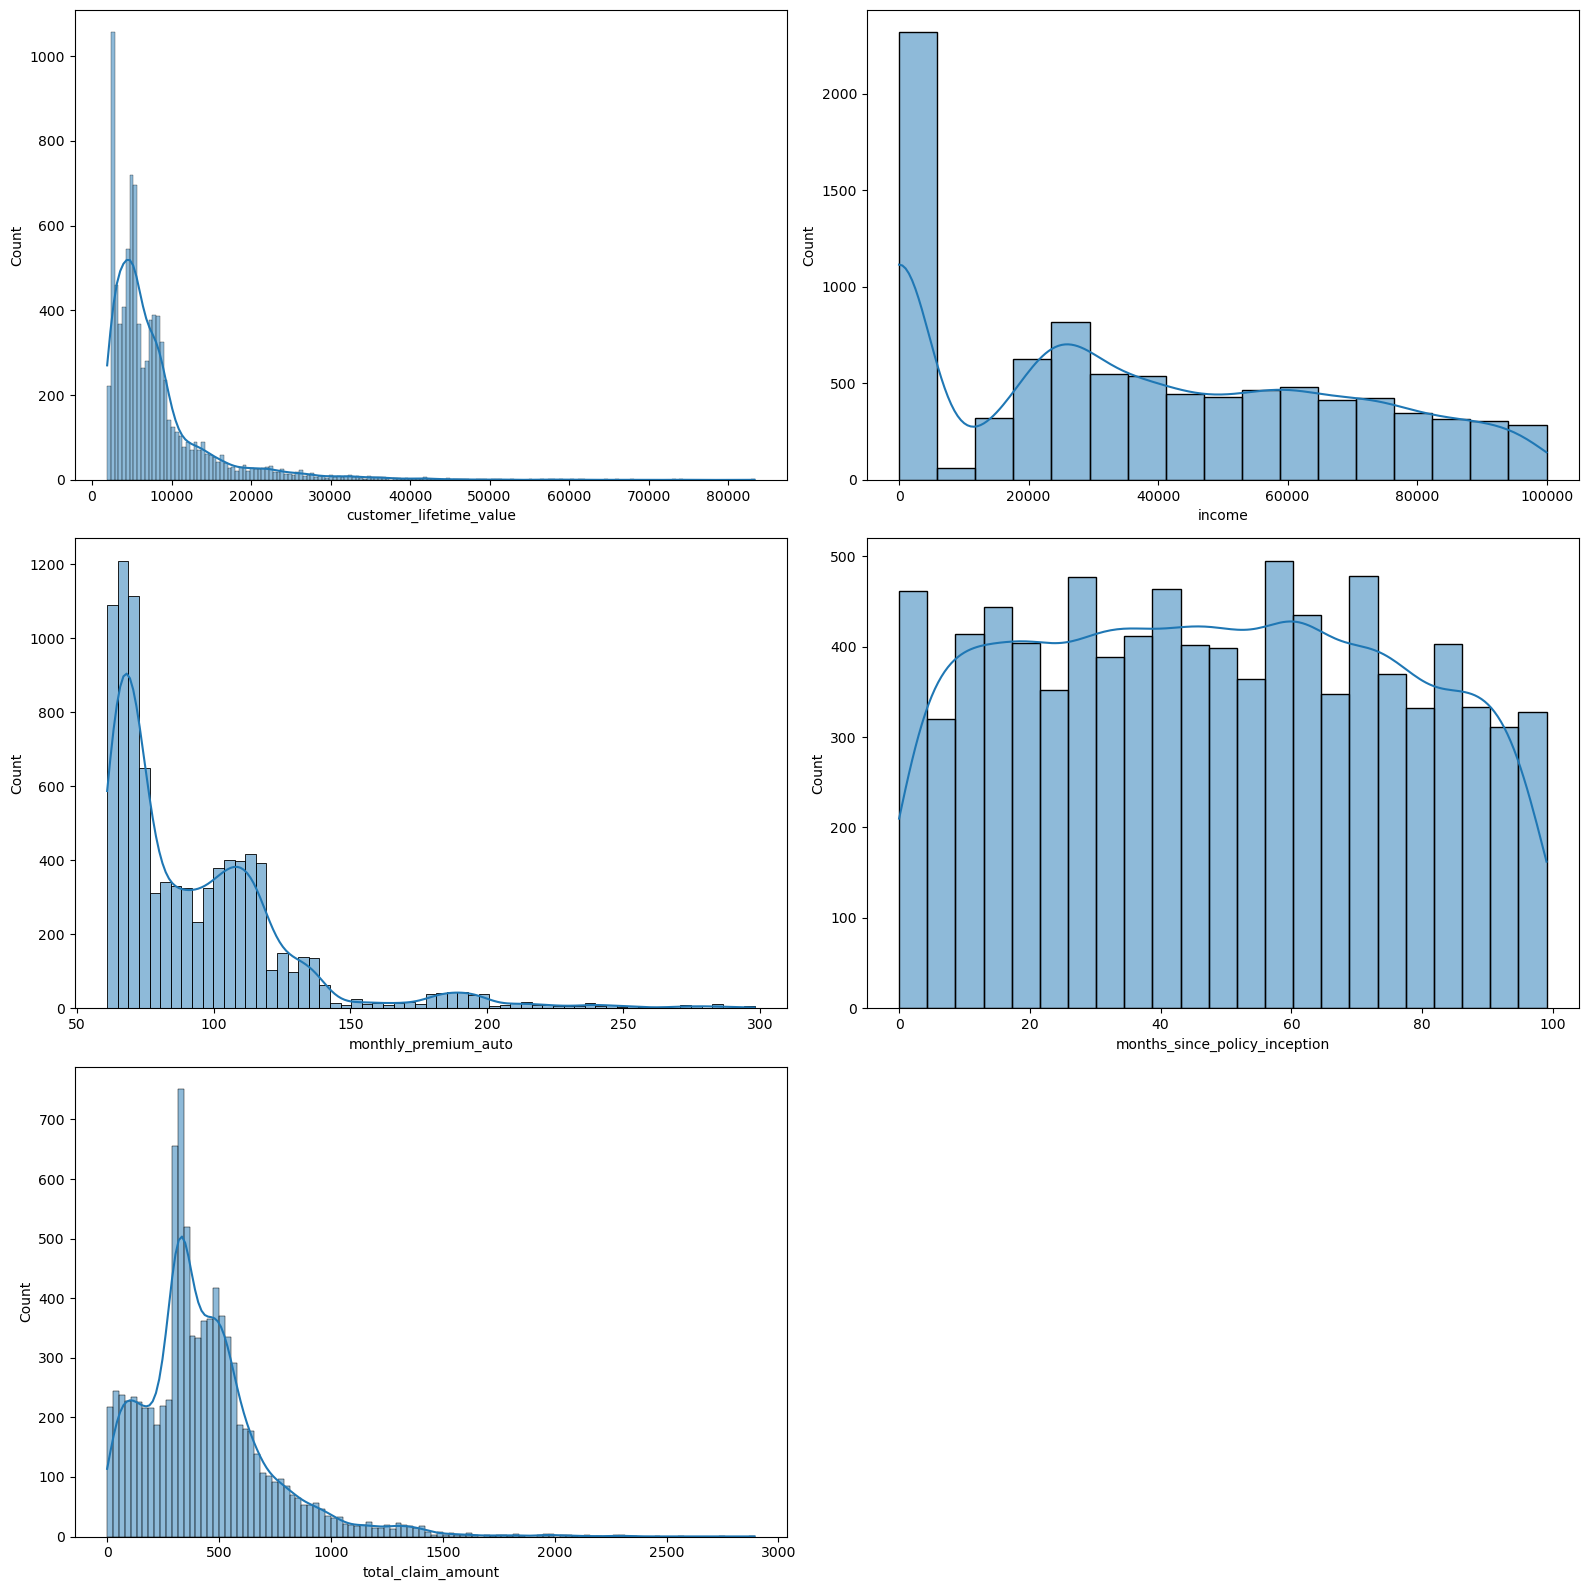

In [25]:
create_histograms(continuous_df)

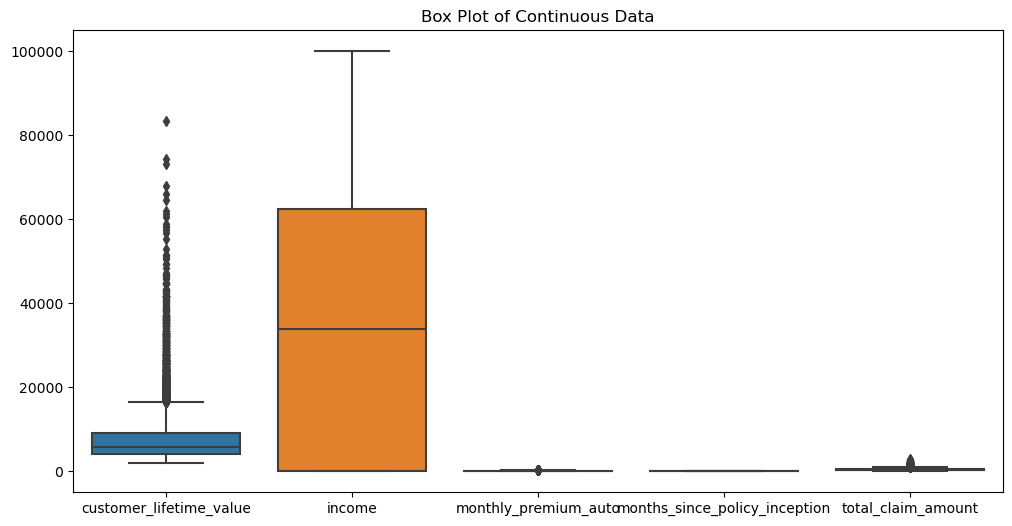

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=continuous_df)
plt.title("Box Plot of Continuous Data")
plt.show()

In [32]:
def plot_outliers(dataframe):
    fig, ax = plt.subplots(figsize=(10, 6))

    dataframe.boxplot(ax=ax)

    ax.set_title('Box Plot of Continuous Variables')
    ax.set_ylabel('Value')

    plt.xticks(rotation=45)

    plt.show()

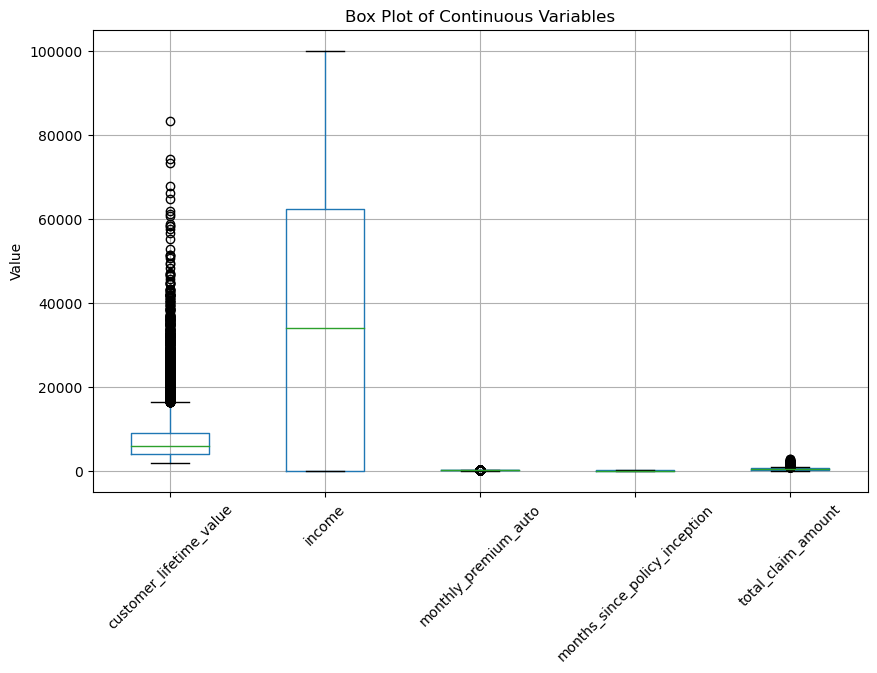

In [33]:
plot_outliers(continuous_df)